In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# train & score model
def model_training(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100)
    # model = SVC(kernel='rbf', probability=True, gamma='auto')
    # model = KNeighborsClassifier()
    model = model.fit(X_train, y_train)
    return model

def plot_model_bounds(X, y, contour=False, density=0.01, cm=plt.cm.viridis, figsize=(8,5)):
    '''
    Plot decision boundaries for models
    Inspired from https://scikit-learn.org/0.15/auto_examples/plot_classifier_comparison.html
    
    Parameters
    ----------
    model : fitted sklearn model
        if contour=True, model need to have predict_prob to work
    X : array
        full feature set
    y : array
        full label set
    contour : boolean
        if False, shows absolute prediction in feature space
        if True, shows prediction probability in feature space
    density : float
        density of np.meshgrid, higher=more curved, but longer creation time
    cm : matplotlib colormap
        https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
        e.g., plt.cm.rainbow
    figsize : tuple of 2 int
        define plot width x height
    '''
    
    # feature scaling, in case it was not done previously
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # dimension reduction if has more than 2 features
    if len(X)>2:
        pca = PCA(n_components=2).fit(X)
        X = pca.transform(X)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

    # create a grid boundary chart using meshgrid
    padding = 0.5
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    xx, yy = np.meshgrid(np.arange(x_min, x_max, density), np.arange(y_min, y_max, density))

    model = model_training(X_train, y_train)
    
    # obtain prediction to represent in feature space
    if contour==True:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    elif contour==False:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # set plot
    plt.figure(figsize=(figsize))
    ax = plt.subplot(1,1,1)

    # plot contour map using margin/probability
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # plot train sets
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='black')
    # plot test sets
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='black', alpha=0.6)

    # set plot variables
    ax.set_xlim(xx.min(), xx.max());
    ax.set_ylim(yy.min(), yy.max());
    ax.set_xticks(());
    ax.set_yticks(());
    # title
    cut = str(model).find('(')
    modelnm = str(model)[:cut]
    score = model.score(X_test, y_test)
    title = '{}, Accuracy: {}'.format(modelnm, round(score,3))
    ax.set_title(title);
    

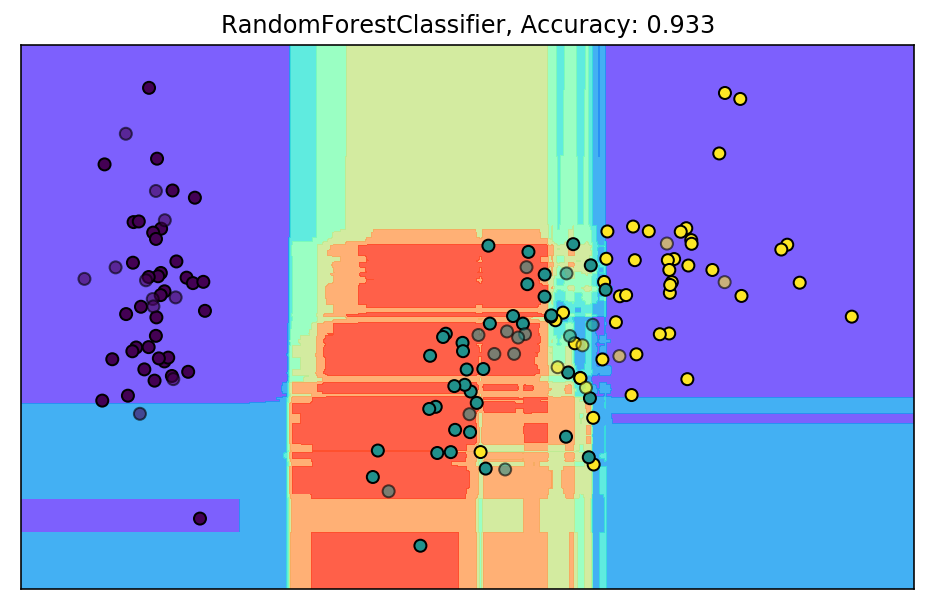

In [31]:
df = load_iris()
X = df['data']
y = df['target']

plot_model_bounds(X, y, contour=True, cm=plt.cm.rainbow)

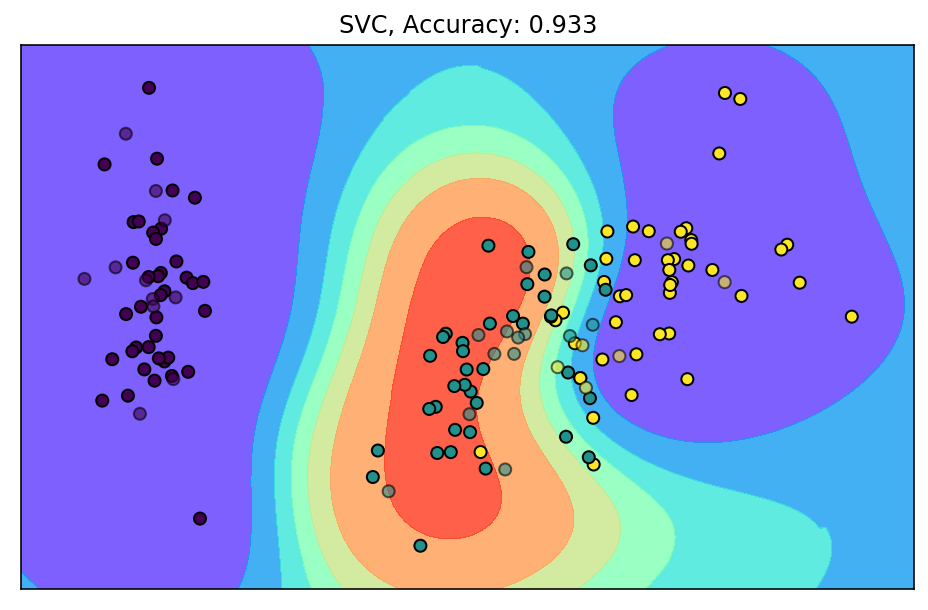

In [29]:
df = load_iris()
X = df['data']
y = df['target']

plot_model_bounds(X, y, contour=True, cm=plt.cm.rainbow)

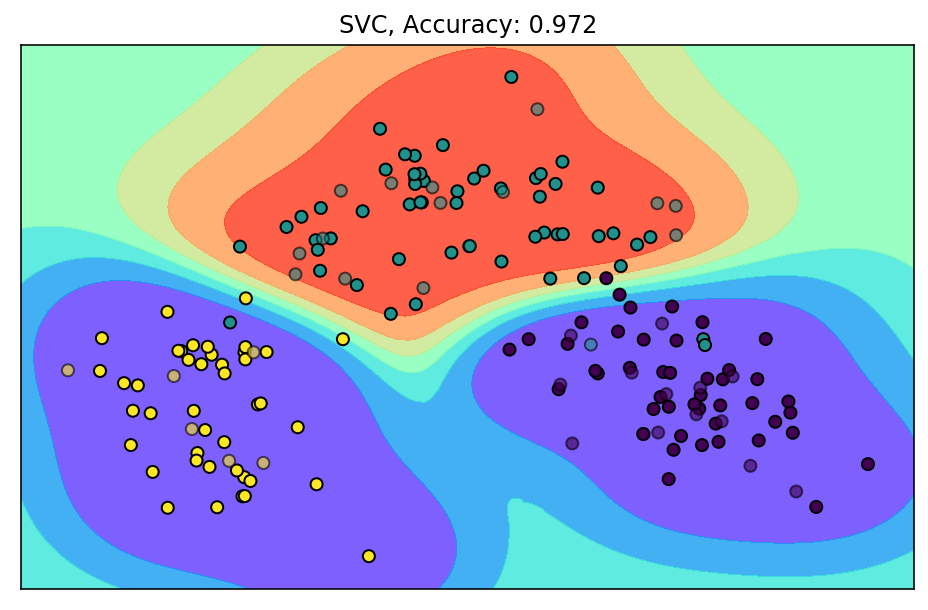

In [26]:
df = load_wine()
X = df['data']
y = df['target']

plot_model_bounds(X, y, contour=True, cm=plt.cm.rainbow)